# This notebook is used to analyze the model after training

In [7]:
## import packages
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from catboost import CatBoostClassifier, Pool, cv, CatBoostError
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import shap
import pickle
from sklearn.metrics import classification_report
from catboost.utils import get_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt 

## Load model

In [2]:
model = CatBoostClassifier(
    loss_function='MultiClass',
    custom_metric='Accuracy',
    learning_rate=0.15,
    random_seed=42,
    l2_leaf_reg=3,
    iterations=2000,
#     task_type="GPU",
)

In [3]:
data_dir = "/global/homes/z/zimingy/KE-Catboost/ziming/GO/data"
trained_model = os.path.join(data_dir, 'catboost_model', 'GO_model_1.json')
try:
    model.load_model(trained_model, format='json')
except:
    print("Model does not exist.")

## Load test data

In [4]:
test_pickle = os.path.join(data_dir, 'go_aggregated_4.1/splited_dataset', 'test_set.pkl')
test_set = pd.read_pickle(test_pickle)
X_test = test_set[test_set.columns[1:]]
y_test = test_set['biome']
print("test dataset shape:", X_test.shape)
print("test label shape:", y_test.shape)

test dataset shape: (8911, 4403)
test label shape: (8911,)


## load train data

In [5]:
train_pickle = os.path.join(data_dir, 'go_aggregated_4.1/splited_dataset', 'train_set.pkl')
train_set = pd.read_pickle(train_pickle)
X_train = train_set[train_set.columns[1:]]
y_train = train_set['biome']
print("test dataset shape:", X_train.shape)
print("test label shape:", y_train.shape)

test dataset shape: (62999, 4403)
test label shape: (62999,)


## Test dataset accuracy

In [5]:
model.score(X_test, y_test)

0.9893390191897654

## Precision and Recall

In [6]:
y_pred = predictions = model.predict(X_test)
y_pred

array([['root:Host-associated:Human:Skin'],
       ['root:Host-associated:Human:Lympathic system:Lymph nodes'],
       ['root:Engineered:Modeled:Simulated communities (microbial mixture)'],
       ...,
       ['root:Host-associated:Human:Skin:Naris'],
       ['root:Environmental:Aquatic:Marine:Hydrothermal vents'],
       ['root:Environmental:Aquatic:Marine']], dtype=object)

In [7]:
## precision and recall for each biome
print(metrics.classification_report(y_test, y_pred, digits=3))

                                                                                           precision    recall  f1-score   support

                                                             root:Engineered:Biogas plant      1.000     1.000     1.000        98
                                            root:Engineered:Biogas plant:Wet fermentation      1.000     1.000     1.000       102
                                                               root:Engineered:Bioreactor      0.980     1.000     0.990        96
root:Engineered:Bioreactor:Continuous culture:Marine sediment inoculum:Wadden Sea-Germany      1.000     1.000     1.000       102
                                  root:Engineered:Bioremediation:Terephthalate:Wastewater      1.000     1.000     1.000       107
                                                        root:Engineered:Built environment      1.000     1.000     1.000        83
                                                          root:Engineered:Food pro

## Confusion matrix

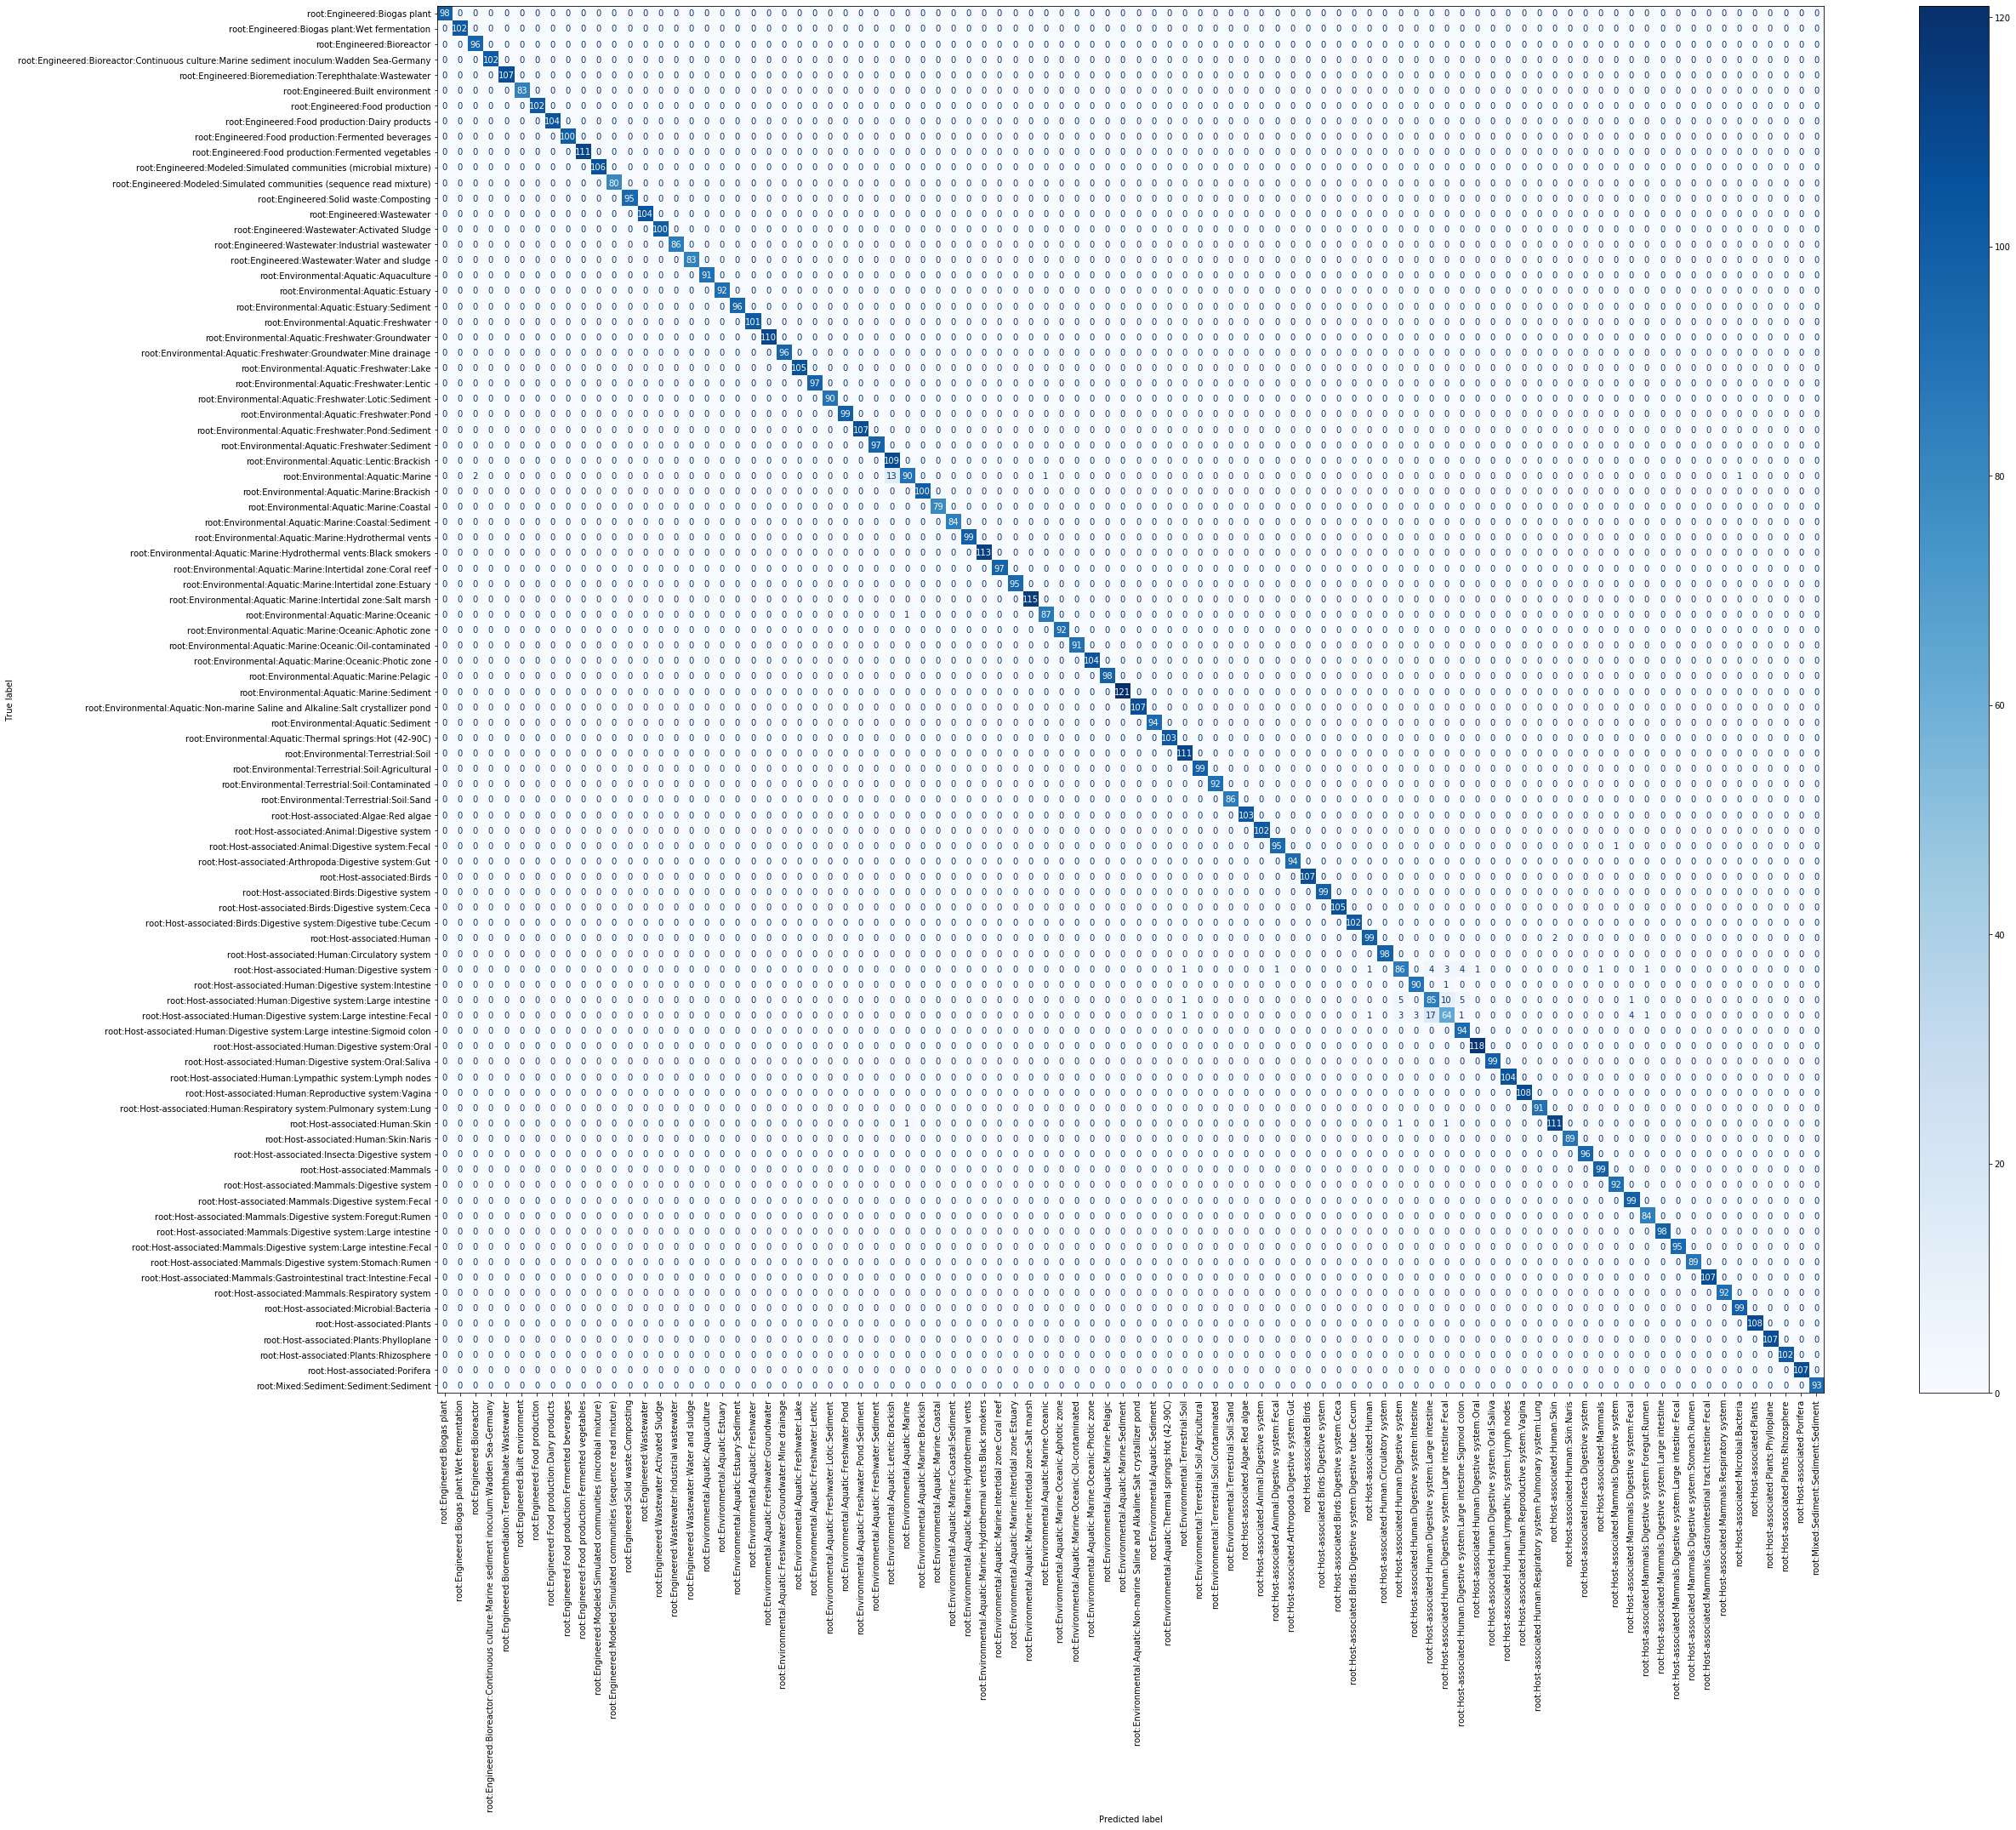

In [8]:
## confusion matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,)
fig = plt.gcf()
fig.set_size_inches(40, 30)
plt.xticks(rotation = 90)
fig.savefig('confusion_matrix.png', dpi=500, bbox_inches='tight')
plt.show()